<a href="https://colab.research.google.com/github/Ajay0110/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
#Data Description
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not 

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost), 2(high cost) and 3(very high cost).

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Classification EDA Capstone Project/data_mobile_price_range.csv')

In [4]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Displaying first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Displaying last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [7]:
# Getting the shape of the dataset
df.shape

(2000, 21)

In [8]:
# Renaming columns
df.rename(columns = {'blue':'bluetooth', 'fc':'front_cam_pix','int_memory':'internal_memory','m_dep':'mobile_depth','mobile_wt':'mobile_weight','pc':'primary_cam_pix','sc_h':'screen_height','sc_w':'screen_width'}, inplace = True)

In [9]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
# Information on null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    2000 non-null   int64  
 1   bluetooth        2000 non-null   int64  
 2   clock_speed      2000 non-null   float64
 3   dual_sim         2000 non-null   int64  
 4   front_cam_pix    2000 non-null   int64  
 5   four_g           2000 non-null   int64  
 6   internal_memory  2000 non-null   int64  
 7   mobile_depth     2000 non-null   float64
 8   mobile_weight    2000 non-null   int64  
 9   n_cores          2000 non-null   int64  
 10  primary_cam_pix  2000 non-null   int64  
 11  px_height        2000 non-null   int64  
 12  px_width         2000 non-null   int64  
 13  ram              2000 non-null   int64  
 14  screen_height    2000 non-null   int64  
 15  screen_width     2000 non-null   int64  
 16  talk_time        2000 non-null   int64  
 17  three_g       

In [11]:
# Checking for null values
df.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_cam_pix      0
four_g             0
internal_memory    0
mobile_depth       0
mobile_weight      0
n_cores            0
primary_cam_pix    0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [12]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


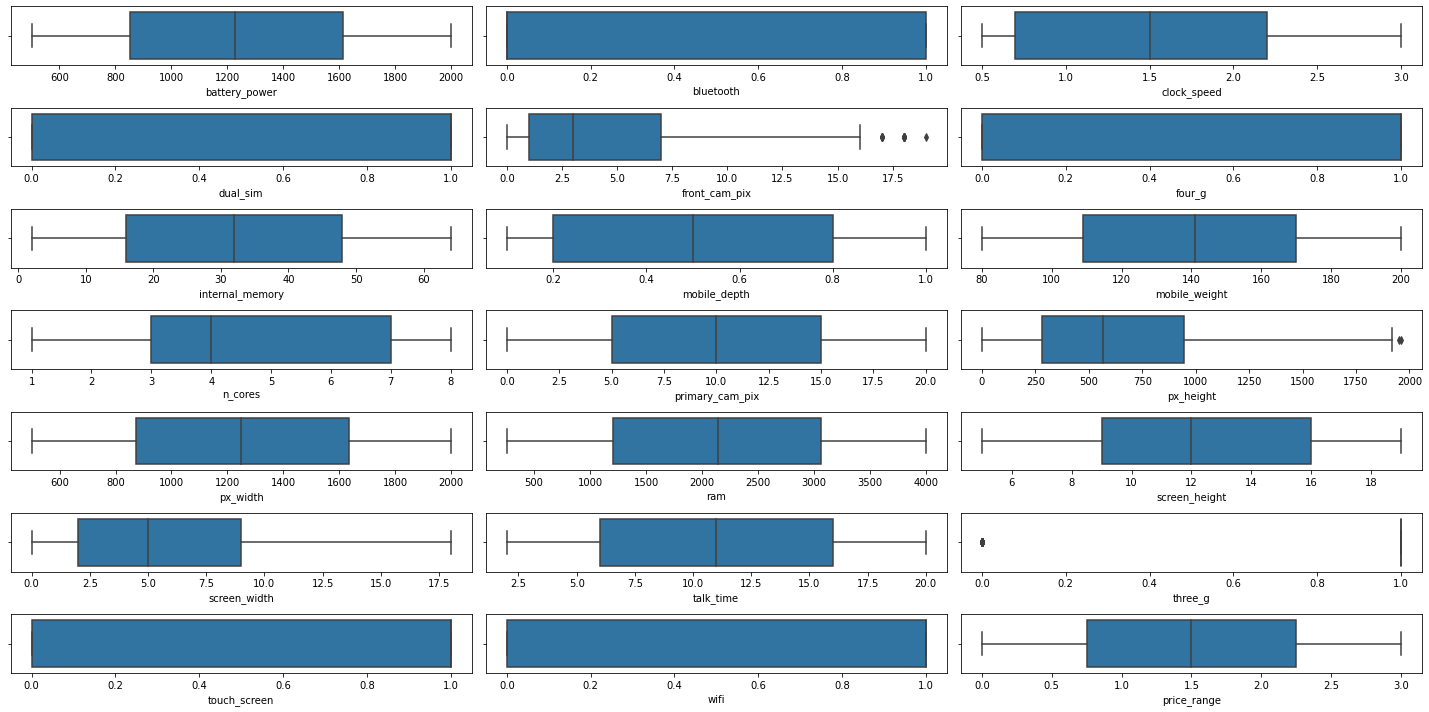

In [13]:
plt.figure(figsize = (20, 10))
x = 1
for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x = x+1
plt.tight_layout()

In [14]:
# To find outliers
out_ls = ['front_cam_pix','px_height']
tot_outliers = 0
for col in out_ls:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  ls = df.index[(df[col] < lower) | (df[col] > upper)]
  print(f"Total outliers found in column {col} are {len(ls)}")
  tot_outliers = tot_outliers+len(ls)
print(f"The total outliers found are {tot_outliers}")
print(f"total percentage of outliers: {(tot_outliers / len(df)*100)} %")

Total outliers found in column front_cam_pix are 18
Total outliers found in column px_height are 2
The total outliers found are 20
total percentage of outliers: 1.0 %


# To handle zeroes in px_height and screen_width

In [15]:
df[df['px_height'] == 0]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [16]:
df[df['screen_width'] == 0]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1,2
54,1073,1,0.5,1,0,0,51,0.5,145,7,0,690,804,2908,6,0,18,0,1,0,2
62,1156,1,1.2,1,0,1,50,0.8,159,2,0,322,547,470,7,0,15,1,1,0,0
73,1038,0,1.2,0,3,0,43,0.7,141,1,5,4,638,3709,11,0,12,1,1,1,3
86,1496,1,2.0,1,4,0,42,0.5,182,5,5,96,741,854,16,0,7,0,1,1,0
119,1778,0,0.5,0,0,0,15,0.5,102,3,0,1445,1954,1214,5,0,14,1,0,0,1


In [17]:
print(f"Total zeroes in column screen_width is {len(df[df['screen_width'] == 0])}")

Total zeroes in column screen_width is 180


In [18]:
# Columns that contain zero which dont make sense
zero = ['px_height', 'screen_width']
for col in zero:
  # Grouping with price_range
  print(f"The mean {col} for each {df.groupby('price_range')[col].mean()}")
  # Replacing zeroes with NaN
  df[col] = df[col].replace(0, np.nan)
  # Replacing NaN with mean
  df[col] = df[col].fillna(df.groupby('price_range')[col].transform('mean'))

The mean px_height for each price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64
The mean screen_width for each price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: screen_width, dtype: float64


In [19]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1


In [20]:
# Creating new columns based on camera present
cam = ['front_cam_pix','primary_cam_pix']
for col in cam:
  df.loc[df[col] == 0, col+'_present'] = 0
  df.loc[df[col] > 0, col+'_present'] = 1

In [21]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1,1.0,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2,0.0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2,1.0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2,0.0,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1,1.0,1.0


In [22]:
# Getting Display size in inches using pythagoras theorem
df['display_size'] = ((np.sqrt(df['screen_height']**2 + df['screen_width']**2)/2.54)).round(2)

In [23]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1,1,1.0,1.0,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2,0.0,1.0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2,1.0,1.0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2,0.0,1.0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1,1.0,1.0,3.25


In [24]:
# Dropping screen height and width
df.drop(columns = ['screen_height', 'screen_width'], inplace = True)
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25


In [25]:
# Getting screen types hd or not hd
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'screen_type'] = 'Not HD'
df.loc[(df['px_width'] >= 1280) | (df['px_height'] >= 720), 'screen_type'] = 'HD'

In [26]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,internal_memory,mobile_depth,mobile_weight,n_cores,primary_cam_pix,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,front_cam_pix_present,primary_cam_pix_present,display_size,screen_type
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,19,0,0,1,1,1.0,1.0,4.49,Not HD
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,HD
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,HD
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,HD
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,HD


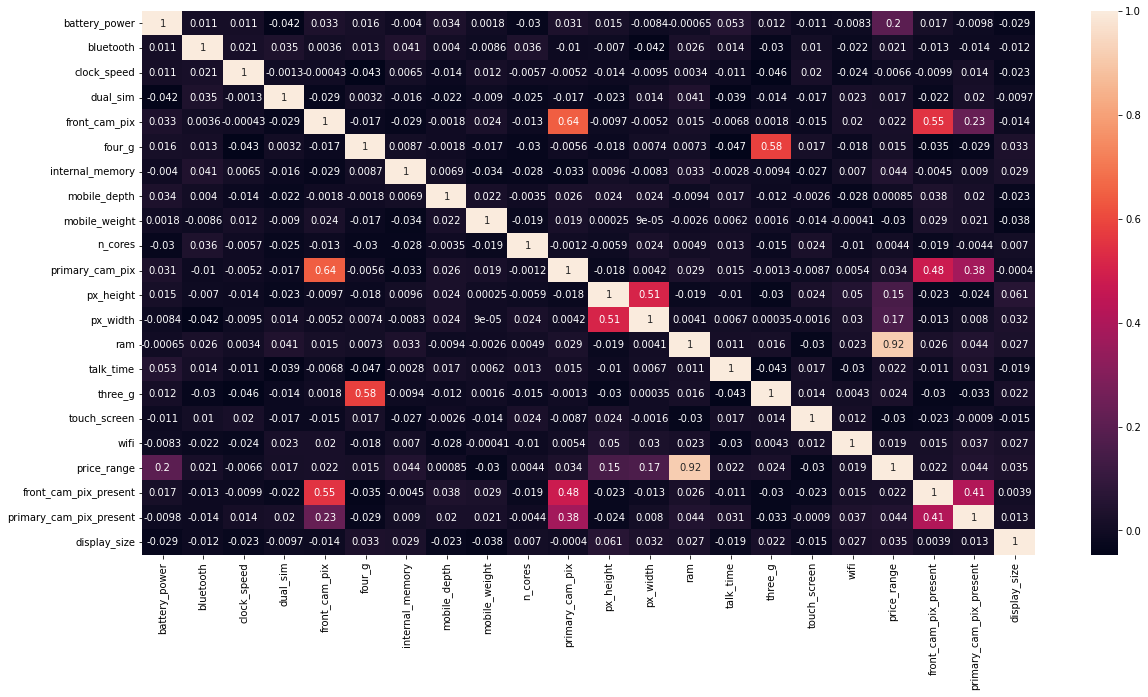

In [30]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)